<a href="https://colab.research.google.com/github/jamunozlab/introductory_mechanics_spring_2023/blob/main/exercises/Phys_2320_exercise_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 12 

Consider a mass attached to a spring that allows the mass to oscillate about its **equilibrium position" $x_0 = 0$ meters** as shown below:

&ensp;&ensp;&ensp;(The equilibrium position is that in which the spring is neither compressed nor elongated.)

.

* In **panel (d)**, the mass is at $x_0$ and has maximum velocity moving to the right. As soon as the mass is to the right of the equilibrium position, the spring is elongated and produces a force in the negative direction.

.

* The spring force $F_s$ increases in magnitude with the elongation of the spring according to Hooke's law, $F_s = -k \Delta \vec{x}$, were $k$ is the spring constant and $\Delta \vec{x}$ is the displacement from equilibrium. Since the velocity is in the positive direction and the acceleration is in the negative direction, the mass eventually stops at some distance $A$ from equilibrium, as shown in **panel (a)**. 

.

* In this example there is also a **Friction Force** $\vec{f_k}$ in the direction opposite to the velocity. 

.

 
 * There is still a force pulling the mass towards the origin, so the mass will accelerate in the negative direction, with an acceleration that is decreasing in magnitude until it becomes zero at the origin. At this stage, the velocity will be maximal and in the negative direction, as shown in **panel (b)**. 

.

* As soon as the mass is to the left of the equilibrium position, the spring is compressed and produces a force in the positive direction according to Hooke's law. Since the velocity is in the negative direction and the acceleration is in the positive direction, the mass eventually stops at some distance $-A$ from equilibrium, as shown in **panel (c)**. 

.

* The whole cycle then repeats, but each time with less energy since the friction is always removing energy from the system. This is a [damped harmonic oscillator](https://en.wikipedia.org/wiki/Harmonic_oscillator). 


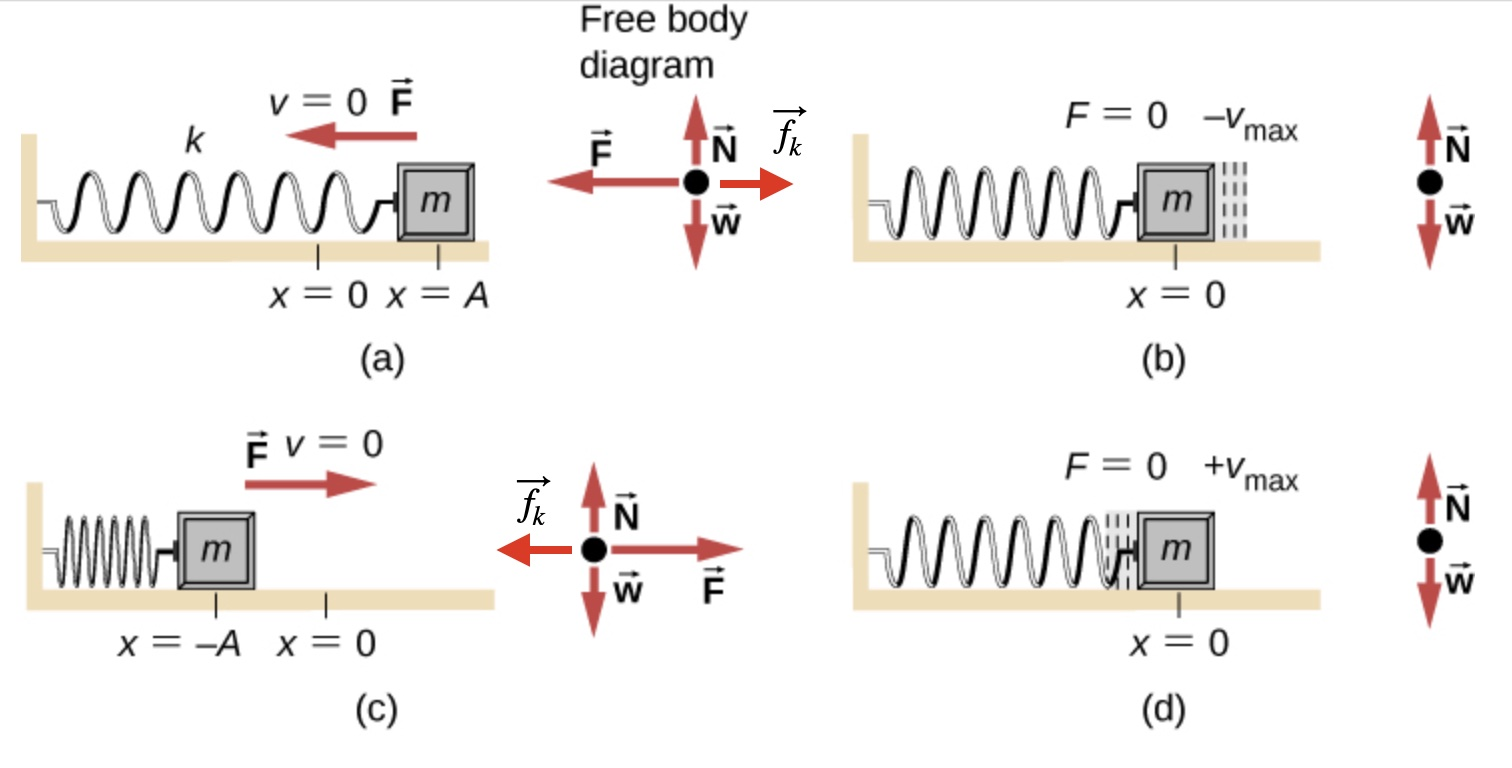

For this exercise, you will put together the main concepts that you have learned about so far in this class: kinematic equations, forces, conservation of energy, and conservation of momentum. 

* In particular, you will learn about $impulse$ $(J)$ and the $change$ $in$ $momentum$ $(Δp):$

.

$\vec{J} = \int{\vec{F} dt} = \Delta \vec{p}$

.

or, in 1 dimension along the $x$-axis,

.

$J_x = \int{F_x dt} = \Delta p_x$

.

You will simulate a mass of  m=1  kg attached to a one-dimensional spring of spring constant  k=1  N/m oscillating about its equilibrium position:

* The equilibrium position will be  x0=0  m and at time  t=0  s

* The mass will be at its equilibrium and will be moving to the right at a Velocity of  v=1  m/s.

* Since the Spring force  Fs=0  at the equilibrium position, the acceleration at  t=0  is  a = 0 m/s 2 .

* We will not consider friction, so the coefficient of kinetic friction, $\mu_k = 0.000$.

  We set the initial conditions by giving appropriate values to the python variables. The potential energy in this case is given by: 

  .

  $The$ $Quartic$ $Spring$ $System$ that you first saw used in Exercise 11)


 $U_{\rm q} = \frac{1}{2} \left[ k (\Delta \vec{x})^2 \right]^2 -  \left[ \frac{1}{2}k (\Delta \vec{x})^2 \right]$


In [ ]:
# Make our lives easier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# EDIT THIS CODE CELL THE CHANGE "mu"
# Initialization
position = 0.0 # position in meters
velocity = 1.0 # velocity in meters per second
acceleration = 0.0 # acceleration in meters per second^2
force = 0.0 # force in Newtons
time = 0.0 # time in seconds
spring_constant = 1.0 # force constant in kg/second^2
mass = 1.0 # mass in kg
time_step = 0.001 # time step in seconds
g = 9.8 # acceleration due to gravity m/s^2
mu = 0.000 # coefficient of kinetic friction # CHANGE THIS VALUE

* The following *molecular dynamics* code uses the kinematic equations to continually update the position, velocity and; by taking the derivative of the given potential, the force exerted on our mass, and it's acceleration. 

* The kinematic equations arise from integrating the equations of motion with constant acceleration, which does not occur in the case of the mass/spring system since the force (and hence the acceleration) is a function of the displacement. 

* Nevertheless, the acceleration is constant if the time step we consider is infinitesimally small. A computer can approximate this by using very small time steps. For our simulation, a time step $\Delta t = 0.01$ s produces good results. The results are plotted below the code.

<Axes: xlabel='position (m)', ylabel='Spring potential energy (J)'>

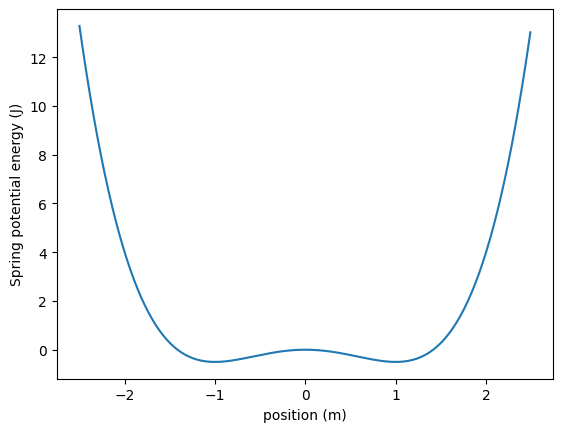

In [ ]:
#Quartic potential energy
# 'sombrero' potential
potential_series = pd.Series([(1/2)*spring_constant*(x/100)**4 - (1/1)*spring_constant*(x/100)**2 for x in range(-250,250)], index=[x/100 for x in range(-250,250)])
potential_series.plot(xlabel="position (m)", ylabel="Spring potential energy (J)")

In [ ]:
# This function calculates Spring Force by approximating the derrivative of potential with respect to position (dU/dx)

  # This function receives two arguments:
  # 1) potential_series, which is a pandas series containing a set of values representing the potential energy at different positions. 
  # 2) User specified position.
    #The function then calculates the derivative of the potential energy at the chosen position using what is known as the "Central Difference Method"

      # Computational Central Difference Method: (Practical)
        #   1) Iterates through the index of the potential_series and finds the position closest to the user specified position. 
        #   2) The difference between the given position and the closest position is then stored in the variable (diff).
          #   (diff) is defined as the difference between values at two points in the series that are "closest" from the the given position
        #   3) The closest "position" is then stored in the variables "closest"
        #   4) The program then uses the "closest" variable to approximate the "Rise & Run" of the function of potential over time
        #   5) Finally, the program approximates the derrivative by dividing the "Rise by the Run" and prints the result

def take_derivative_at(potential_series, position):
  diff = np.inf  #Infinity
  closest = 0
  for index, pos in enumerate(potential_series.index): #position at each index is enumerated  
    if abs(position - pos) < diff: # this IF will always execute the first iteration
      diff = abs(position - pos) 
      closest = index # Closest = 0 
  rise = potential_series.iloc[closest+1] - potential_series.iloc[closest-1]  #  ΔU = - Uf - Ui
  run = potential_series.index[closest+1] - potential_series.index[closest-1] # Δx = xf - xi
  slope = rise/run # ΔU / Δx 

  return slope

In [ ]:
# Now that we've calculated Spring Force by approximating the derrivative of potential with respect to position (dU/dx)
# We can use Kinematics and Newtons second law to approximate the values of our remaining variables.

# Creating variable arrays
time_list = [time]
position_list = [position]
velocity_list = [velocity]
acceleration_list = [acceleration]
force_list = [force]

# Starting Loop
i=1
while i < 200000:
    time = time + time_step
    position = position + velocity*time_step + (1/2)*(acceleration*time_step**2) #Xf = xi + v(Δt)
    velocity = velocity + acceleration*time_step #Vf = Vi + a(Δt)
    spring_force = -1*take_derivative_at(potential_series=potential_series, position=position)  #Fs = -kΔx

    if velocity < 0: # moving to the left
      friction_force = mu*mass*g #friction to the right
    else: # moving to the right
      friction_force = -mu*mass*g # friction to the left 
                                                             # We set the coefficient of friction to Zero, so friction will not affect 
    if abs(velocity) < 0.001: # if moving extremely slowly
      friction_force = 0 # no friction because almost not moving

    force = spring_force + friction_force # Fnet = Fs + Fk
    acceleration = force/mass

# After all calculations have been computed they are then stored into our variable arrays
   
    time_list.append(time)
    position_list.append(position)
    velocity_list.append(velocity)
    acceleration_list.append(acceleration)
    force_list.append(force)
    i = i + 1

<Axes: xlabel='time (s)', ylabel='position (m)'>

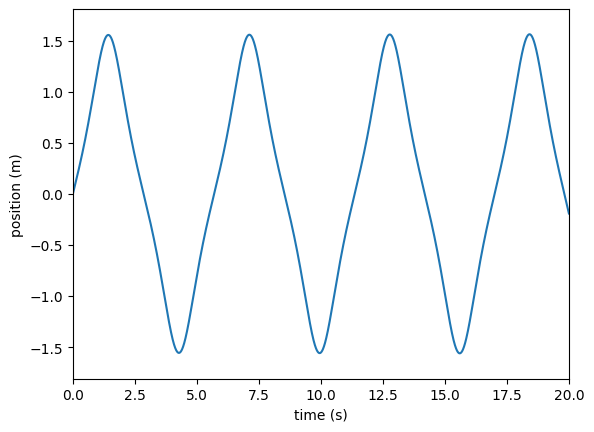

In [ ]:
position_series = pd.Series(position_list, index=time_list)
position_series.plot(ylabel="position (m)", xlabel="time (s)", xlim=(0, 20))

<Axes: xlabel='time (s)', ylabel='velocity (m/s)'>

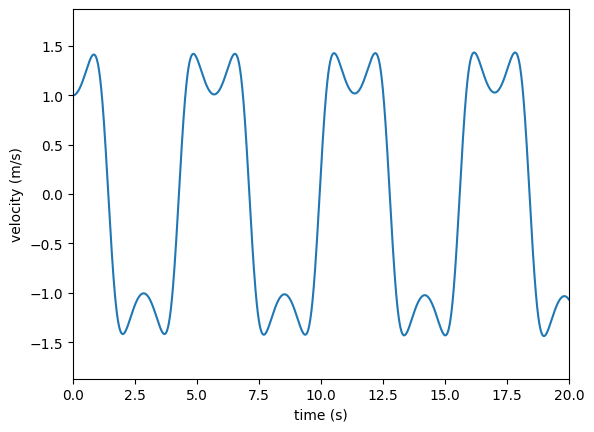

In [ ]:
velocity_series = pd.Series(velocity_list, index=time_list)
velocity_series.plot(ylabel="velocity (m/s)", xlabel="time (s)", xlim=(0, 20))

<Axes: xlabel='time (s)', ylabel='acceleration (m/s^2)'>

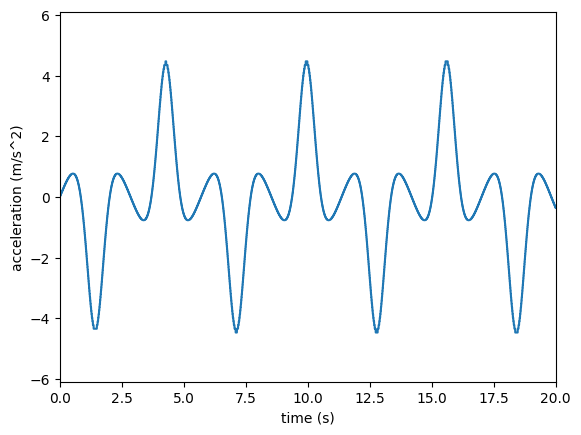

In [ ]:
acceleration_series = pd.Series(acceleration_list, index=time_list)
acceleration_series.plot(ylabel="acceleration (m/s^2)", xlabel="time (s)", xlim=(0, 20))

<Axes: xlabel='time (s)', ylabel='force (N)'>

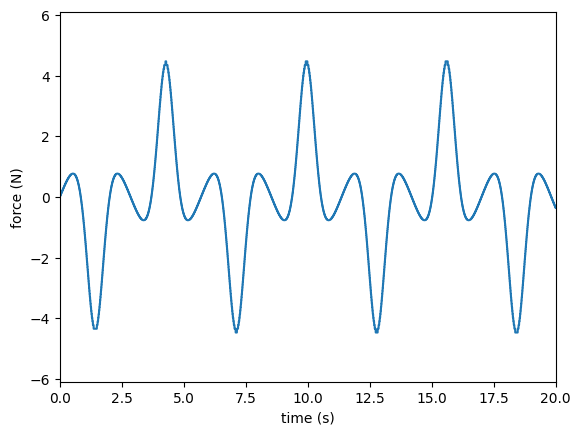

In [ ]:
force_series = pd.Series(force_list, index=time_list)
force_series.plot(ylabel="force (N)", xlabel="time (s)", xlim=(0,20)) # EDIT THIS IS THE CODE LINE TO FIND GLOBAL MINIMA/MAXIMA

<Axes: xlabel='position (m)', ylabel='velocity (m/s)'>

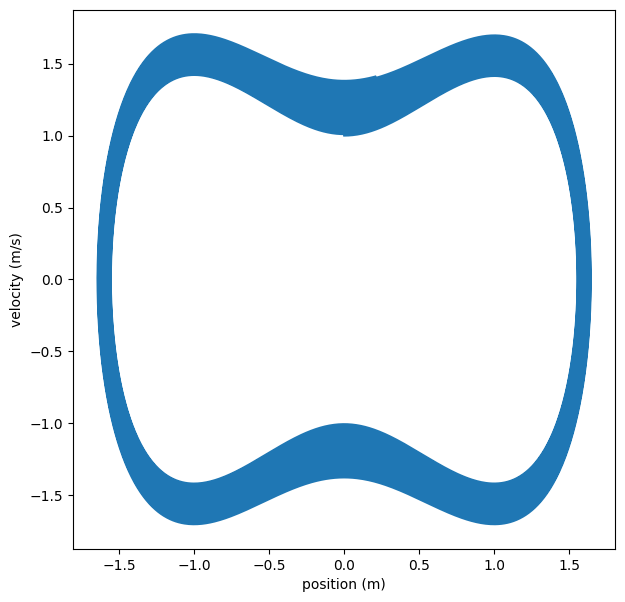

In [ ]:
phase_series = pd.Series(velocity_series.values, index=position_series.values)
phase_series.plot(xlabel="position (m)", ylabel="velocity (m/s)", figsize=(7,7))

# Action items

 1. By visual inspection, identify the times $t$ at which there are local and global minima and maxima in force_series.
 
  * HINT: You can modify the range of the horizontal axis by changing xlim. For example, xlim=(0, 10)) will show you only the first 10 seconds. 

 2. The impulse (J) along the $x$-$axis$ was defined in the introduction, Below you can find a Python function that will perform the Integration using the: "The Central DIfference Method" and a "Rise Times Run Approximation"
   
&emsp;&emsp;Using your previous answer, compute the impulse between:
  
&emsp;&emsp;&emsp;&emsp;A) a global minimum and a global maximum

&emsp;&emsp;&emsp;&emsp;B)  between a global minimum and a local maximum. 

&emsp;&emsp;Are they they equal or not? Explain using physics arguments. 

.

3. What are the differences and similarities between the two Python functions " take_derivative_at() " and " integrate_between() " ?

 .

4. In the "Initialization cell" of the $Molecular$ $Dynamics$ $Code$ $Simulation$, change the value of the coefficient of friction so that $mu$ $=$ $0.002$ and run the code again. 

HINTS:
* Restart the session runtime, and re-evaluate all code cells after making the changes. 
* Change xlim=(0, 200) for the position, velocity, acceleration, and force series to visualize these quantities for the whole simulation time. 

.

Explain the similarities and differences of position, velocity, acceleration, force, and phase when friction is included in the simulation. Is mechanical energy conserved in the system?

.

5. Answer Action Items 1 and 2, but for the case where friction is present. 


In [ ]:
# This function calculates Impulse (J) by approximating the Integral of Force with respect to time  # (dF/dt)

  # This function takes in three arguments:
  # 1) force_series, which is a pandas series containing "sets" of values representing the force at different times. 
  # 2) User specified starting time.
  # 3) User specified ending time.

    # The function then calculates the Integral of the Force between the chosen start and end times, using "The Central DIfference Method" and what is known as the "Rise Times Run Approximation":

        # The Central DIfference Method & "Rise Times Run Approximation": (Practical)
          #   1) Iterates through the index of the force_series and finds the "start and end times" that are closest to the user specified times. 
          #   2) The difference between the given time and the closest time is then stored in the variable (diff).
            #   (diff) is defined as the difference between values at two times in the series that are "closest" to the the given "start and end times"
          #   3) The closest "start and end times" are then stpred in the variables "closest_start & closest_end"
          #   4) The program then uses the "closest_start & closest_end" variable to approximate the "Rise & Run" of the function of force over time
          #   5) Finally, we are able to approximate the integral of our force by multiplying "rise * run" and printing that value


# Since the impulse is the integral of the force with respect to time 
# create a python function to do that
def integrate_betweeen(force_series, time_start, time_end):
  # Find the index of the series that is closest to the start time
  diff = np.inf
  closest_start = 0
  for index, time in enumerate(force_series.index): # time at each index is enumerated

    if abs(time_start - time) < diff: # This "if" will always execute the first iteration, and then only execute afterward "if" a closer position is found in the series
      diff = abs(time_start - time) # Assign "current smallest difference"
      closest_start = index # Assign closest time (smallest diffrence) to "closest_start"

  # Find the index of the series that is closest to the end time
  diff = np.inf
  closest_end = 0
  for index, time in enumerate(force_series.index): # time at each index is enumerated
    if abs(time_end - time) < diff: # This "if" will always execute the first iteration, and then only execute afterward "if" a closer position is found in the series
      diff = abs(time_end - time) # Assign "current smallest difference"
      closest_end = index # Assign closest time (smallest diffrence) to "end"

  # The integral is approximately rise times run
  rise = force_series.iloc[closest_end] - force_series.iloc[closest_start]  # ΔF = Ff - Fi
  run = force_series.index[closest_end] - force_series.index[closest_start] # Δt = tf - ti
  integral = rise*run  # rise times run approximation # (ΔU * Δt)

  return integral # return approximated integral 

In [ ]:
# Usage example
integrate_betweeen(force_series, time_start=0.0, time_end=20.0)

-7.324880000000534